In [50]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch 
from scipy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
log_returns_df = pd.read_csv("C:\Athreya\Acads\Courses\DA6701\Assignments\DA6701-Assignments\Assignment_3\data\daily_log_returns.csv")
train_df = pd.read_csv("C:\Athreya\Acads\Courses\DA6701\Assignments\DA6701-Assignments\Assignment_3\data\daily_train.csv")
test_df = pd.read_csv("C:\Athreya\Acads\Courses\DA6701\Assignments\DA6701-Assignments\Assignment_3\data\daily_test.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\athre\AppData\Local\Temp\ipykernel_29268\2882303036.py:1: SyntaxWarning: invalid escape sequence '\A'
  log_returns_df = pd.read_csv("C:\Athreya\Acads\Courses\DA6701\Assignments\DA6701-Assignments\Assignment_3\data\daily_log_returns.csv")
C:\Users\athre\AppData\Local\Temp\ipykernel_29268\2882303036.py:2: SyntaxWarning: invalid escape sequence '\A'
  train_df = pd.read_csv("C:\Athreya\Acads\Courses\DA6701\Assignments\DA6701-Assignments\Assignment_3\data\daily_train.csv")
C:\Users\athre\AppData\Local\Temp\ipykernel_29268\2882303036.py:3: SyntaxWarning: invalid escape sequence '\A'
  test_df = pd.read_csv("C:\Athreya\Acads\Courses\DA6701\Assignments\DA6701-Assignments\Assignment_3\data

In [52]:
log_returns_df.head()

,Date,TCS.NS,INFY.NS,HCLTECH.NS,TATASTEEL.NS,HINDALCO.NS,JINDALSTEL.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,NESTLEIND.NS
0,2021-03-01,0.010277,0.010872,0.022721,0.021100,0.011252,0.027890,0.015841,0.017578,0.035886,0.005309,0.014851,0.011783
1,2021-03-02,0.027706,0.029168,0.024841,0.006958,0.003336,-0.020770,0.005948,0.003528,-0.000406,0.015991,0.014396,0.017263
2,2021-03-03,0.017394,0.029496,0.011985,0.055083,0.040028,0.032713,0.011823,0.034769,0.029301,0.007114,0.000238,0.007399
3,2021-03-04,-0.003078,-0.009874,-0.007540,-0.025016,-0.027936,-0.037900,-0.022174,-0.018119,-0.000948,0.001549,-0.001192,-0.002245
4,2021-03-05,-0.013751,-0.010314,-0.017373,-0.033063,-0.033759,-0.043109,-0.014309,-0.018372,0.012984,0.001910,-0.005499,0.007242


In [53]:
log_returns_df['Date'] = pd.to_datetime(log_returns_df['Date'])
log_returns_df.head()

,Date,TCS.NS,INFY.NS,HCLTECH.NS,TATASTEEL.NS,HINDALCO.NS,JINDALSTEL.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,NESTLEIND.NS
0,2021-03-01,0.010277,0.010872,0.022721,0.021100,0.011252,0.027890,0.015841,0.017578,0.035886,0.005309,0.014851,0.011783
1,2021-03-02,0.027706,0.029168,0.024841,0.006958,0.003336,-0.020770,0.005948,0.003528,-0.000406,0.015991,0.014396,0.017263
2,2021-03-03,0.017394,0.029496,0.011985,0.055083,0.040028,0.032713,0.011823,0.034769,0.029301,0.007114,0.000238,0.007399
3,2021-03-04,-0.003078,-0.009874,-0.007540,-0.025016,-0.027936,-0.037900,-0.022174,-0.018119,-0.000948,0.001549,-0.001192,-0.002245
4,2021-03-05,-0.013751,-0.010314,-0.017373,-0.033063,-0.033759,-0.043109,-0.014309,-0.018372,0.012984,0.001910,-0.005499,0.007242


In [54]:
test_df.head()

,Date,TCS.NS,INFY.NS,HCLTECH.NS,TATASTEEL.NS,HINDALCO.NS,JINDALSTEL.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,NESTLEIND.NS
0,2025-02-28,-0.036448,-0.044387,-0.033802,-0.010801,0.003790,-0.006810,0.018468,-0.015125,-0.023167,-0.024668,-0.016571,-0.039644
1,2025-03-03,0.002810,0.012308,-0.001684,0.009936,0.003462,-0.002105,-0.017968,0.001742,0.006103,-0.006137,0.006183,-0.001874
2,2025-03-04,0.011103,-0.011952,-0.023747,0.005541,0.007980,0.015044,0.004954,0.003476,-0.003558,-0.008998,-0.006563,-0.018029
3,2025-03-05,0.004238,0.013648,0.024097,0.047374,0.024174,0.027689,-0.011765,0.004369,0.013174,0.006054,0.025504,0.023254
4,2025-03-06,0.015262,0.002538,0.007915,0.029273,0.036740,0.025413,0.000710,0.001931,-0.005915,0.022100,0.001604,0.001910


In [55]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df.head()

,Date,TCS.NS,INFY.NS,HCLTECH.NS,TATASTEEL.NS,HINDALCO.NS,JINDALSTEL.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,NESTLEIND.NS
0,2025-02-28,-0.036448,-0.044387,-0.033802,-0.010801,0.003790,-0.006810,0.018468,-0.015125,-0.023167,-0.024668,-0.016571,-0.039644
1,2025-03-03,0.002810,0.012308,-0.001684,0.009936,0.003462,-0.002105,-0.017968,0.001742,0.006103,-0.006137,0.006183,-0.001874
2,2025-03-04,0.011103,-0.011952,-0.023747,0.005541,0.007980,0.015044,0.004954,0.003476,-0.003558,-0.008998,-0.006563,-0.018029
3,2025-03-05,0.004238,0.013648,0.024097,0.047374,0.024174,0.027689,-0.011765,0.004369,0.013174,0.006054,0.025504,0.023254
4,2025-03-06,0.015262,0.002538,0.007915,0.029273,0.036740,0.025413,0.000710,0.001931,-0.005915,0.022100,0.001604,0.001910


In [56]:
train_df.head()

,Date,TCS.NS,INFY.NS,HCLTECH.NS,TATASTEEL.NS,HINDALCO.NS,JINDALSTEL.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,NESTLEIND.NS
0,2021-03-02,0.027706,0.029168,0.024841,0.006958,0.003336,-0.020770,0.005948,0.003528,-0.000407,0.015991,0.014395,0.017263
1,2021-03-03,0.017394,0.029496,0.011986,0.055083,0.040028,0.032713,0.011823,0.034769,0.029301,0.007114,0.000238,0.007399
2,2021-03-04,-0.003078,-0.009873,-0.007539,-0.025016,-0.027936,-0.037900,-0.022174,-0.018119,-0.000948,0.001549,-0.001191,-0.002245
3,2021-03-05,-0.013751,-0.010314,-0.017373,-0.033063,-0.033759,-0.043109,-0.014309,-0.018371,0.012984,0.001910,-0.005499,0.007242
4,2021-03-08,-0.000366,0.014364,0.021436,0.005372,-0.003707,0.005260,-0.006886,-0.002300,-0.003465,-0.012135,-0.002641,0.004135


In [57]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.head()

,Date,TCS.NS,INFY.NS,HCLTECH.NS,TATASTEEL.NS,HINDALCO.NS,JINDALSTEL.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,NESTLEIND.NS
0,2021-03-02,0.027706,0.029168,0.024841,0.006958,0.003336,-0.020770,0.005948,0.003528,-0.000407,0.015991,0.014395,0.017263
1,2021-03-03,0.017394,0.029496,0.011986,0.055083,0.040028,0.032713,0.011823,0.034769,0.029301,0.007114,0.000238,0.007399
2,2021-03-04,-0.003078,-0.009873,-0.007539,-0.025016,-0.027936,-0.037900,-0.022174,-0.018119,-0.000948,0.001549,-0.001191,-0.002245
3,2021-03-05,-0.013751,-0.010314,-0.017373,-0.033063,-0.033759,-0.043109,-0.014309,-0.018371,0.012984,0.001910,-0.005499,0.007242
4,2021-03-08,-0.000366,0.014364,0.021436,0.005372,-0.003707,0.005260,-0.006886,-0.002300,-0.003465,-0.012135,-0.002641,0.004135


In [58]:
def get_ivp(cov):
    ivp = 1.0 / np.diag(cov)
    return ivp / ivp.sum()

def get_cluster_var(cov, cluster_items):
    cov_slice = cov.loc[cluster_items, cluster_items]
    weights = get_ivp(cov_slice).reshape(-1, 1)
    return np.dot(np.dot(weights.T, cov_slice), weights)[0, 0]

def get_hrp_weights(cov, sorted_indices):
    # Recursive bisection to assign weights based on the tree topology
    weights = pd.Series(1.0, index=sorted_indices)
    clusters = [sorted_indices]
    
    while len(clusters) > 0:
        # Bisect clusters recursively
        clusters = [c[i:j] for c in clusters for i, j in ((0, len(c) // 2), (len(c) // 2, len(c))) if len(c) > 1]
        for i in range(0, len(clusters), 2):
            left, right = clusters[i], clusters[i + 1]
            left_var = get_cluster_var(cov, left)
            right_var = get_cluster_var(cov, right)
            
            alloc_factor = 1 - left_var / (left_var + right_var)
            weights[left] *= alloc_factor
            weights[right] *= (1 - alloc_factor)
    return weights

def get_min_var_weights(cov):
    # Standard MPT Minimum Variance allocation (requires matrix inversion)
    inv_cov = inv(cov)
    ones = np.ones(len(inv_cov))
    w = np.dot(inv_cov, ones)
    return w / np.sum(w)

In [59]:
cov_train = train_df.cov()
corr_train = train_df.corr()
# Compute distance matrix and linkage
dist = np.sqrt(0.5 * (1 - corr_train))
linkage = sch.linkage(dist, 'single')
sort_ix = sch.leaves_list(linkage)
sorted_assets = train_df.columns[sort_ix]

C:\Users\athre\AppData\Local\Temp\ipykernel_29268\2314476354.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(dist, 'single')


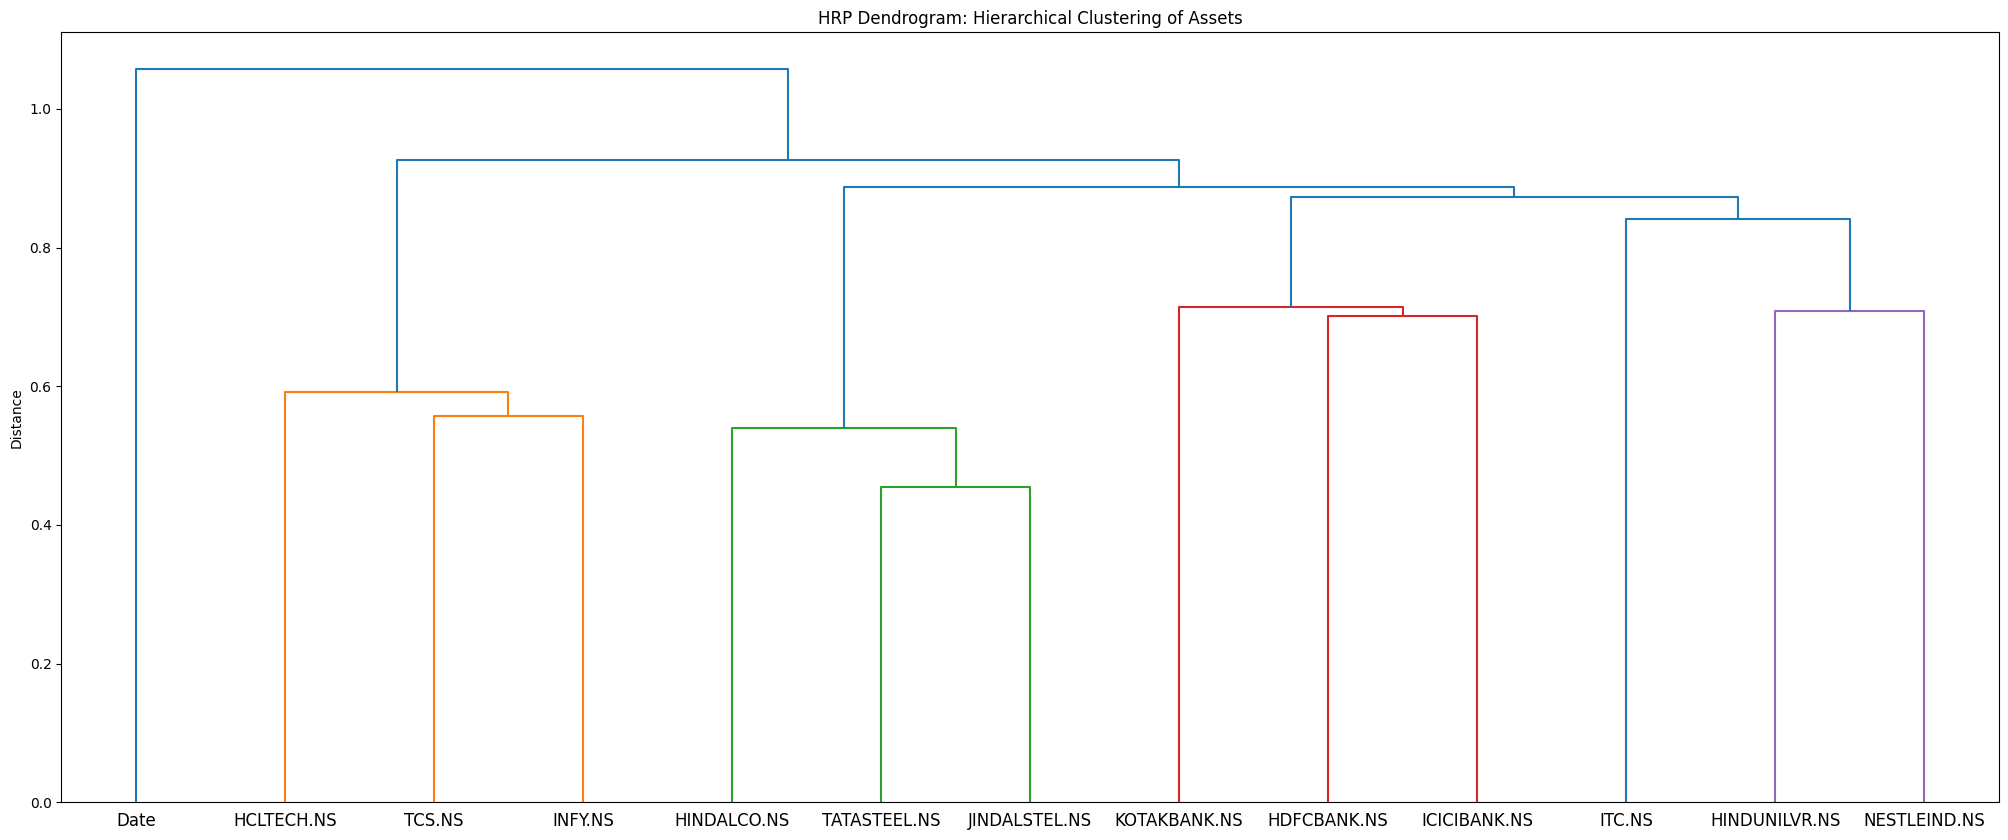

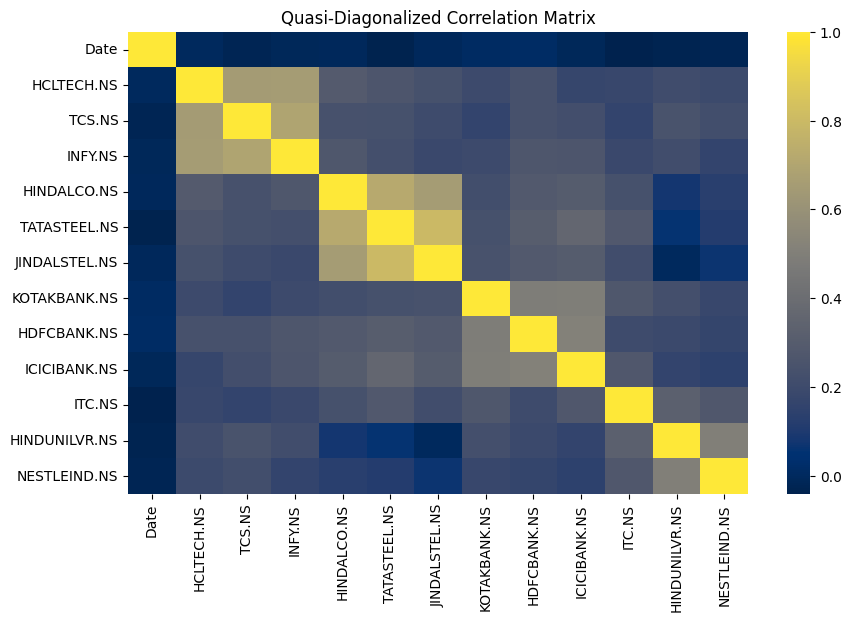

In [60]:
# 1. Plot Dendrogram
plt.figure(figsize=(25, 10))
dn = sch.dendrogram(linkage, labels=train_df.columns)
plt.title("HRP Dendrogram: Hierarchical Clustering of Assets")
plt.ylabel("Distance")
plt.show()

# 2. Plot Quasi-Diagonalized Correlation Matrix
# This shows how clustering groups correlated assets together
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[sorted_assets].corr(), annot=False, cmap='cividis')
plt.title("Quasi-Diagonalized Correlation Matrix")
plt.show()

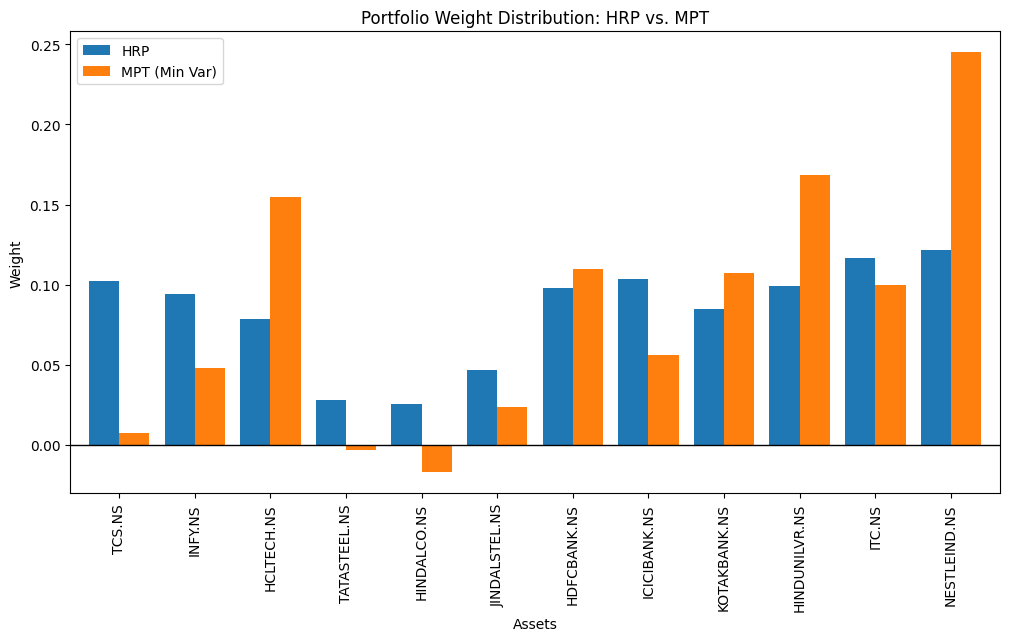

In [61]:
w_hrp_train = get_hrp_weights(cov_train, sorted_assets)
w_mpt_train = get_min_var_weights(cov_train)
w_hrp_test = get_hrp_weights(test_df.cov(), sorted_assets)
w_mpt_test = get_min_var_weights(test_df.cov())
hrp_turnover = np.sum(np.abs(w_hrp_test - w_hrp_train))
mpt_turnover = np.sum(np.abs(w_mpt_test - w_mpt_train))

# Create a DataFrame for plotting
weights_df = pd.DataFrame({
    'HRP': w_hrp_train,
    'MPT (Min Var)': w_mpt_train
}).reindex(train_df.columns)
weights_df.drop(['Date'], axis = 0, inplace = True)
# Plotting
weights_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("Portfolio Weight Distribution: HRP vs. MPT")
plt.ylabel("Weight")
plt.xlabel("Assets")
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

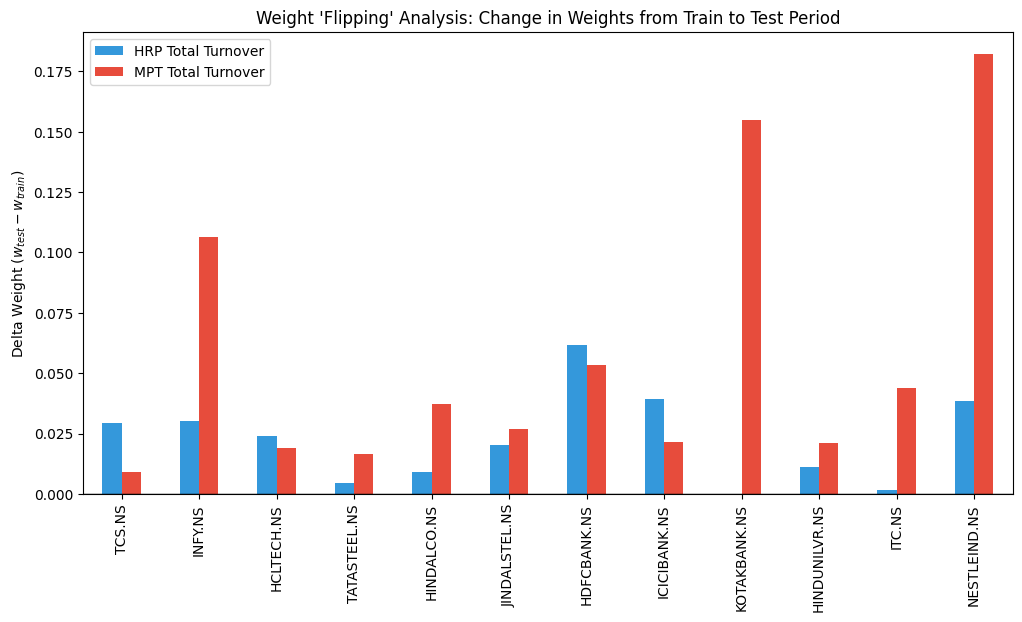

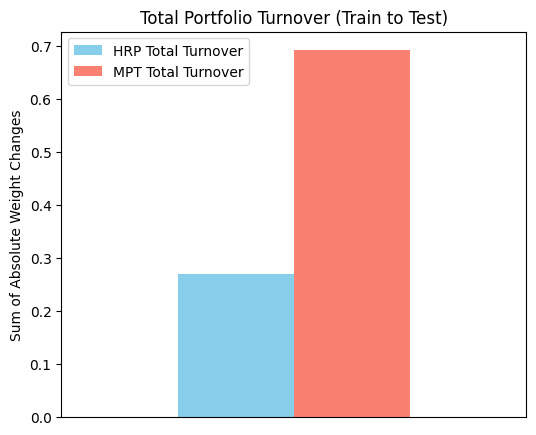

HRP Stability Advantage: 156.69% less turnover than MPT


In [62]:
# Calculate absolute shifts for each asset
hrp_shifts = np.abs(w_hrp_test - w_hrp_train)
mpt_shifts = np.abs(w_mpt_test - w_mpt_train)

turnover_data = pd.DataFrame({
    'HRP Total Turnover': [hrp_shifts.sum()],
    'MPT Total Turnover': [mpt_shifts.sum()]
})

delta_df = pd.DataFrame({
    'HRP Total Turnover': (hrp_shifts),
    'MPT Total Turnover': (mpt_shifts)
}).reindex(train_df.columns)

delta_df.drop(['Date'], axis=0, inplace = True)

plt.figure(figsize=(12, 6))
delta_df.plot(kind='bar', figsize=(12, 6), color=['#3498db', '#e74c3c'])
plt.title("Weight 'Flipping' Analysis: Change in Weights from Train to Test Period")
plt.ylabel("Delta Weight ($w_{test} - w_{train}$)")
plt.axhline(0, color='black', lw=1)
plt.show()

# Plot Turnover
turnover_data.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6, 5))
plt.title("Total Portfolio Turnover (Train to Test)")
plt.ylabel("Sum of Absolute Weight Changes")
plt.xticks([])
plt.show()

print(f"HRP Stability Advantage: {((mpt_shifts.sum() / hrp_shifts.sum()) - 1) * 100:.2f}% less turnover than MPT")